In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
from lxml import objectify
%matplotlib inline

data_folder = './data/'


In [2]:
#Movie metadata
df_movie = pd.read_table(data_folder +'movie.metadata.tsv',header=None)
df_movie.columns=['Wikipedia_movie_ID' , 'Freebase_movie_ID', 'Movie_name' , 'Movie_date' , 'Movie_revenue' , 'Movie_runtime' , 'Movie_languages' , 'Movie_countries' , 'Movie_genres']
df_movie


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


In [3]:
#Create a dictionnary which transcript freebase id to name
dic_id_to_name = pd.Series(df_movie['Movie_name'].values,index=df_movie['Freebase_movie_ID']).to_dict()
dic_id_to_name

{'/m/03vyhn': 'Ghosts of Mars',
 '/m/08yl5d': 'Getting Away with Murder: The JonBenét Ramsey Mystery',
 '/m/0crgdbh': 'Brun bitter',
 '/m/0285_cd': 'White Of The Eye',
 '/m/01mrr1': 'A Woman in Flames',
 '/m/03cfc81': 'The Gangsters',
 '/m/04jcqvw': "The Sorcerer's Apprentice",
 '/m/02qc0j7': "Alexander's Ragtime Band",
 '/m/06_y2j7': 'Contigo y aquí',
 '/m/075f66': 'City of the Dead',
 '/m/017n1p': 'Sarah and Son',
 '/m/07kjkz6': 'Lady Snowblood 2: Love Song of Vengeance',
 '/m/0gffwj': 'Little city',
 '/m/016ywb': 'Henry V',
 '/m/04cqrs4': 'Aaah Belinda',
 '/m/02r52hc': 'The Mechanical Monsters',
 '/m/0g5qvzg': '1919',
 '/m/0kcn7': 'Mary Poppins',
 '/m/0gyryjt': 'Die Fahne von Kriwoj Rog',
 '/m/0gj30jx': 'Keep the Change',
 '/m/017n1b': "The Devil's Holiday",
 '/m/02wjqm': 'New Rose Hotel',
 '/m/05p45cv': 'White on Rice',
 '/m/0h964n1': 'Freddy and the Song of the South Pacific',
 '/m/0g4_n3m': 'Road to Life',
 '/m/047t9rb': 'Camera Thrills',
 '/m/05pckh0': 'Ferdinando I, re di Napol

In [4]:
df_revenue=df_movie.iloc[df_movie['Movie_revenue'].index[~df_movie['Movie_revenue'].apply(np.isnan)]]
df_revenue


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
7,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ..."
13,171005,/m/016ywb,Henry V,1989-11-08,10161099.0,137.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/04xvh5"": ""Costume drama"", ""/m/082gq"": ""Wa..."
17,77856,/m/0kcn7,Mary Poppins,1964-08-27,102272727.0,139.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3myq"": ""Children's/Family"", ""/m/04t36""..."
21,612710,/m/02wjqm,New Rose Hotel,1999-10-01,21521.0,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
...,...,...,...,...,...,...,...,...,...
81695,54540,/m/0f7hw,Coming to America,1988-06-29,288752301.0,117.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/03p5xs"": ""..."
81720,7761830,/m/0kvgqb,Spaced Invaders,1990,15369573.0,100.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie..."
81725,1918494,/m/0660qx,State and Main,2000-08-26,6944471.0,106.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/0f8l9c"": ""France"", ""/m/09c7w0"": ""United S...","{""/m/0gf28"": ""Parody"", ""/m/09n5t_"": ""Americana..."
81726,664006,/m/030xw6,Guilty as Sin,1993-06-04,22886222.0,107.0,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."


<AxesSubplot:xlabel='Movie_revenue', ylabel='Count'>

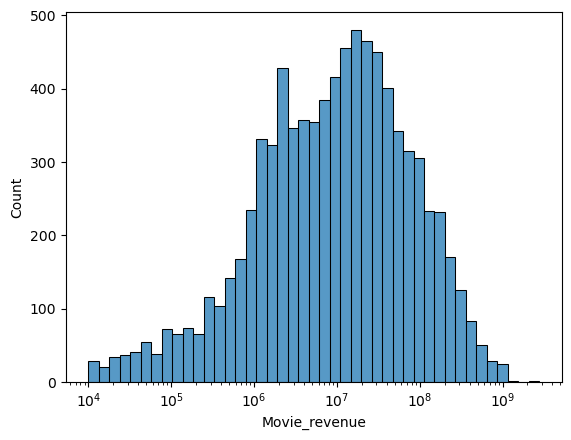

In [5]:
#See the distribution of movie revenues
sns.histplot(data=df_revenue, x='Movie_revenue', stat = 'count' , log_scale= True)

In [6]:
#Get the 10 more expensive movies
df_revenue.sort_values(by='Movie_revenue' , axis=0 , ascending = False)
df_most_expensive_movies = df_revenue.sort_values(by='Movie_revenue' , axis=0 , ascending = False).iloc[0:10]
df_most_expensive_movies

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_date,Movie_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
23702,4273140,/m/0bth54,Avatar,2009-12-10,2.782275e+09,178.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
22256,52371,/m/0dr_4,Titanic,1997-11-01,2.185372e+09,194.0,"{""/m/02bjrlw"": ""Italian Language"", ""/m/02h40lc...","{""/m/09c7w0"": ""United States of America""}","{""/m/0fx2s"": ""Tragedy"", ""/m/04xvh5"": ""Costume ..."
28192,22114132,/m/062zm5h,The Avengers,2012-04-11,1.511758e+09,137.0,"{""/m/06b_j"": ""Russian Language"", ""/m/02h40lc"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ..."
30278,31941988,/m/0gvsynb,Harry Potter and the Deathly Hallows – Part 2,2011-07-07,1.328111e+09,130.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/07s9rl0"": ""Drama"", ""/m/02n4kr"": ""Mystery""..."
18645,25001260,/m/0872p_c,Transformers: Dark of the Moon,2011-06-23,1.123747e+09,157.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hj3mt0"": ""Alien Film"", ""/m/06n90"": ""Scie..."
80920,174251,/m/017jd9,The Lord of the Rings: The Return of the King,2003-12-17,1.119930e+09,250.0,"{""/m/05p2d"": ""Old English language"", ""/m/02h40...","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0hj3n2k"": ""Fantasy Adventure"", ""/m/03k9fj..."
54719,29075630,/m/0bpm4yw,The Dark Knight Rises,2012-07-16,1.078009e+09,165.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America"", ""/m/...","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th..."
69586,1213838,/m/04hwbq,Toy Story 3,2010-06-12,1.063172e+09,102.0,"{""/m/02h40lc"": ""English Language"", ""/m/06nm1"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/03k9fj"": ""Adventure"", ""/m/0hj3myq"": ""Chil..."
14303,24314116,/m/09v8clw,Pirates of the Caribbean: On Stranger Tides,2011-05-07,1.043872e+09,136.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02qvnvs"": ""Swashbuckler films"", ""/m/03k9f..."
50039,50793,/m/0ddt_,Star Wars Episode I: The Phantom Menace,1999-05-19,1.027045e+09,136.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/02kdv5l"": ..."


In [85]:
#Summary of avatar

#Extract dataframe from xml file
df_summary_avatar = pd.read_xml(data_folder+'/corenlp_plot_summaries/4273140.xml' , xpath='//token',parser='lxml')
df_summary_avatar.rename(columns={'id':'word_id'},inplace=True)
df_summary_avatar.insert(0, "sentence_id",df_summary_avatar['word_id'].ne(df_summary_avatar['word_id'].shift()+1).cumsum(), True) #add sentence id by indexing sequences  
df_summary_avatar.set_index(['sentence_id', 'word_id'], inplace=True) #multiindex: sentence id, word id

#Filter only the nouns
df_summary_avatar_noun = df_summary_avatar[(df_summary_avatar.POS=='NN') | (df_summary_avatar.POS=='NNS')]
#Count the number of redundant words 
df_summary_avatar_noun.groupby(['word'])['word'].count().sort_values(ascending=False)



word
Souls      6
Tree       6
humans     4
avatar     4
battle     3
          ..
men        1
mind       1
mineral    1
mines      1
|          1
Name: word, Length: 75, dtype: int64

In [82]:
#Filter only the verbs
df_summary_avatar_noun = df_summary_avatar[(df_summary_avatar.POS=='VB') | (df_summary_avatar.POS=='VBD') | (df_summary_avatar.POS=='VBG') | (df_summary_avatar.POS=='VBN') | (df_summary_avatar.POS=='VBP') | (df_summary_avatar.POS=='VBZ')]
#Count the number of redundant verbs 
df_summary_avatar_noun.groupby(['word'])['word'].count().sort_values(ascending=False)


word
is           10
are           8
leaving       3
have          3
falls         3
             ..
give          1
get           1
formulate     1
follows       1
wrapped       1
Name: word, Length: 126, dtype: int64

In [8]:
#Character metadata
df_character = pd.read_table(data_folder +'character.metadata.tsv',header=None)
df_character.columns=['Wikipedia_movie_ID' , 'Freebase_movie_ID' , 'Movie_date' , 'Character_name' , 'Actor_date_of_birth' , 'Actor_gender' , 'Actor_height' , 'Actor_ethnicity' , 'Actor_name' , 'Actor_age_at_movie_release' , 'Freebase_character_actor_ID' , 'Freebase_character_ID' , 'Freebase_actor_ID'  ]
df_character


,Wikipedia_movie_ID,Freebase_movie_ID,Movie_date,Character_name,Actor_date_of_birth,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character_actor_ID,Freebase_character_ID,Freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


/var/folders/7f/308myzg93lxbpdkq9j5gnczr0000gn/T/ipykernel_97110/596559579.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(dic_id_to_name[df_most_expensive_movies['Freebase_movie_ID'].values[i]] for i in range(len(df_most_expensive_movies['Freebase_movie_ID'].values)))


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Avatar'),
  Text(1, 0, 'Titanic'),
  Text(2, 0, 'The Avengers'),
  Text(3, 0, 'Harry Potter and the Deathly Hallows – Part 2'),
  Text(4, 0, 'Transformers: Dark of the Moon'),
  Text(5, 0, 'The Lord of the Rings: The Return of the King'),
  Text(6, 0, 'The Dark Knight Rises'),
  Text(7, 0, 'Toy Story 3'),
  Text(8, 0, 'Pirates of the Caribbean: On Stranger Tides'),
  Text(9, 0, 'Star Wars Episode I: The Phantom Menace')])

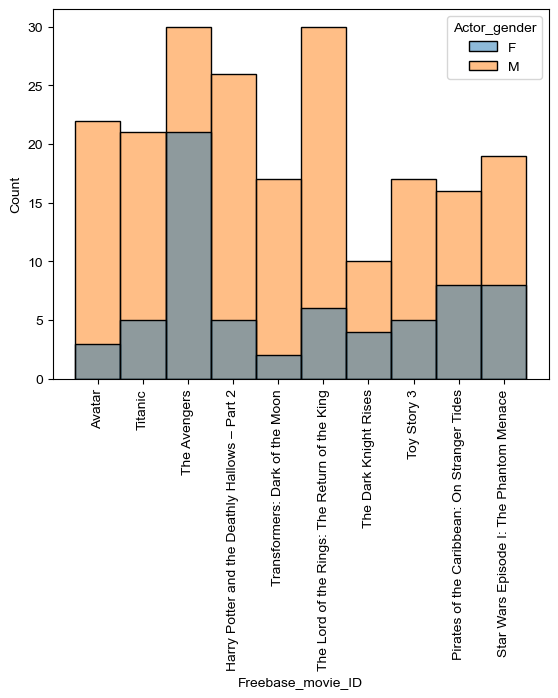

In [9]:
#Male and Female characters of 10 most expensive movies
df_expensive_movie_character = df_character[df_character['Freebase_movie_ID'].isin(df_most_expensive_movies['Freebase_movie_ID'])]


ax=plt.figure()
g=sns.histplot(data = df_expensive_movie_character, x='Freebase_movie_ID', hue='Actor_gender' , stat='count')
g.set_xticklabels(dic_id_to_name[df_most_expensive_movies['Freebase_movie_ID'].values[i]] for i in range(len(df_most_expensive_movies['Freebase_movie_ID'].values)))
sns.set(rc={'figure.figsize':(20,8.27)})
plt.xticks(rotation=90)


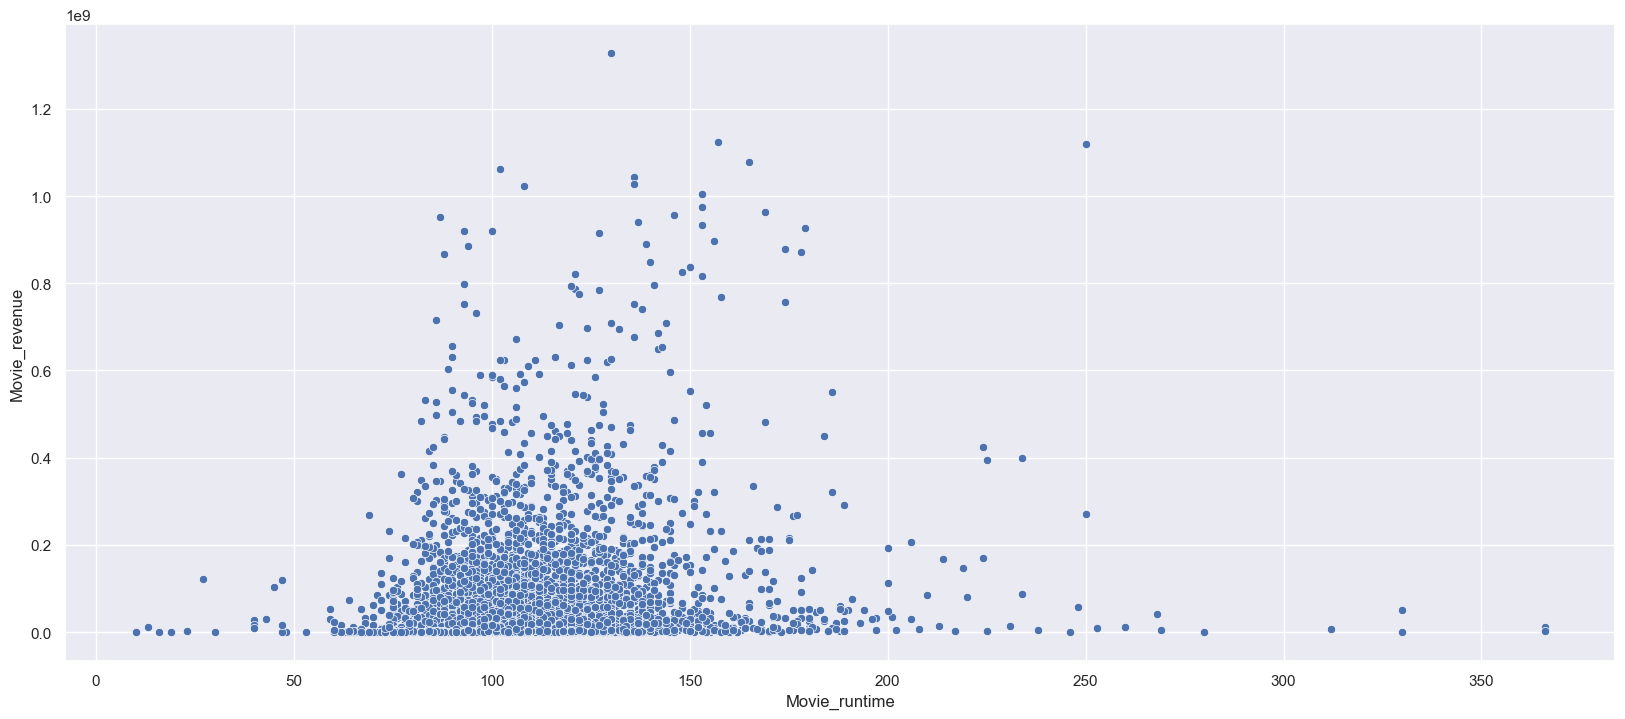

In [10]:
#Plot of revenue vs runtime
sns.scatterplot(data=df_revenue[(df_revenue.Movie_runtime<400) & (df_revenue.Movie_revenue<1500000000) ] , x='Movie_runtime' , y='Movie_revenue' )
plt.show()


In [11]:
#For each genre, what is the mean revenue?

#Find the list of different genres 
genres_list=sorted(list( set(df_revenue['Movie_genres'].apply( lambda x: list(eval(x).values())).sum()) ) ) #extract all possible genres and fill a list with unique genres

#Data frame with each genre as a column and each movies as rows
dic_genres={genres_list[i]: df_revenue['Movie_genres'].str.contains(genres_list[i]) for i in range(len(genres_list)) }
df_genres=pd.DataFrame(dic_genres)
df_genres.insert(0,'Movie_name',df_revenue['Movie_name'])
df_genres.insert(1,'Movie_revenue',df_revenue['Movie_revenue'])


#Dataframe with the mean revenue of each genre
dic_genres_revenue = { genres_list[i]: [ df_genres[df_genres[genres_list[i]] == True]['Movie_revenue'].mean() ,  df_genres[df_genres[genres_list[i]] == True]['Movie_revenue'].count() ] for i in range(len(genres_list))  }
df_genres_revenue = pd.DataFrame(dic_genres_revenue).T
df_genres_revenue['Genre']=df_genres_revenue.index
df_genres_revenue.index = range(len(df_genres_revenue.index))
df_genres_revenue['Mean_revenue']=df_genres_revenue[0]
df_genres_revenue['Count']=df_genres_revenue[1]
del df_genres_revenue[df_genres_revenue.columns[0]]
del df_genres_revenue[df_genres_revenue.columns[0]]
df_genres_revenue


df_genres_revenue[df_genres_revenue['Count']>10].sort_values(by='Mean_revenue',ascending=False) #Ranking of highest revenue (occurence >10)




,Genre,Mean_revenue,Count
77,Computer Animation,3.145635e+08,84.0
25,Apocalyptic and post-apocalyptic fiction,2.439320e+08,13.0
253,Sci-Fi Adventure,2.360394e+08,19.0
118,Fairy tale,2.318123e+08,16.0
145,Glamorized Spy Film,2.084662e+08,31.0
...,...,...,...
262,Silent film,6.371314e+06,33.0
41,Black-and-white,5.800800e+06,368.0
30,Avant-garde,2.955409e+06,21.0
116,Experimental film,2.776471e+06,23.0
